In [1]:
from sigmaepsilon.solid.material import MembraneSection as Section
from sigmaepsilon.math.linalg import ReferenceFrame
from sigmaepsilon.solid.material import ElasticityTensor
from sigmaepsilon.solid.material.utils import elastic_stiffness_matrix

E = 2890.0
nu = 0.2
yield_strength = 2.0

thickness = 25.0

hooke = elastic_stiffness_matrix(E=E, NU=nu)
frame = ReferenceFrame(dim=3)
tensor = ElasticityTensor(
    hooke, frame=frame, tensorial=False, yield_strength=yield_strength
)

section = Section(
    layers=[
        Section.Layer(material=tensor, thickness=thickness / 3),
        Section.Layer(material=tensor, thickness=thickness / 3),
        Section.Layer(material=tensor, thickness=thickness / 3),
    ]
)
section.elastic_stiffness_matrix().shape

(3, 3)

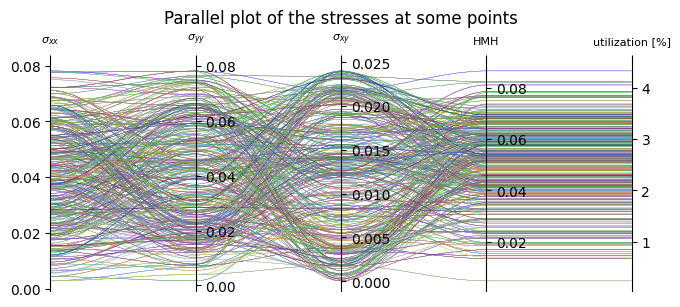

In [2]:
from sigmaepsilon.mesh.plotting import parallel_mpl
import numpy as np

strains = 2 * np.random.rand(300, 3) / 100000  # random data
z = np.array([-1.0, 0.0, 1.0])

stresses = section.calculate_stresses(strains=strains, z=z)
hmh = section.calculate_equivalent_stress(strains=strains, z=z)
util = section.utilization(strains=strains, z=z) * 100

nXY, nZ, nStress = stresses.shape
stresses = stresses.reshape((nXY*nZ, nStress))
hmh = hmh.reshape((nXY*nZ))
util = util.reshape((nXY*nZ))

colors = np.random.rand(stresses.shape[0], 3)
labels = [str(i) for i in range(stresses.shape[-1])]
values = [stresses[:, i] for i in range(stresses.shape[-1])]
values += [hmh, util]

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]
labels += [r"HMH", r"utilization [%]"]

_ = parallel_mpl(
    values,
    labels=labels,
    padding=0.05,
    lw=0.2,
    colors=colors,
    title="Parallel plot of the stresses at some points",
)

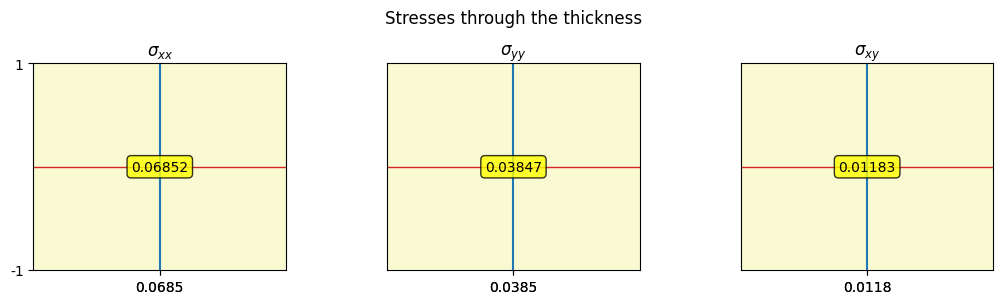

In [3]:
from sigmaepsilon.mesh.plotting.mpl.parallel import aligned_parallel_mpl
import numpy as np

n_data = 150
z = np.linspace(-1.0, 1.0, n_data)
stresses = section.calculate_stresses(strains=strains, z=z)

labels = [r"$\sigma_{xx}$", r"$\sigma_{yy}$", r"$\sigma_{xy}$"]

fig = aligned_parallel_mpl(
    stresses[50, :, :],
    z,
    yticks=[-1, 1],
    y0=0.0,
    figsize=(12, 3),
    suptitle="Stresses through the thickness",
    labels=labels,
)

# Adjusts the top of the subplots to make room for the title
fig.subplots_adjust(top=0.80) 